In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [3]:
np.random.seed(2304)

In [4]:
pd.set_option('display.max_rows', 500)

In [5]:
heart = pd.read_csv(r'Heart_attack.csv' )
heart


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
5,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
6,32,1,2,110,225,0,0,184,0,0.0,?,?,?,0
7,32,1,2,125,254,0,0,155,0,0.0,?,?,?,0
8,33,1,3,120,298,0,0,185,0,0.0,?,?,?,0
9,34,0,2,130,161,0,0,190,0,0.0,?,?,?,0


In [6]:
heart = heart[heart.fbs !='?']
heart = heart[heart.chol !='?']
heart = heart[heart.thalach !='?']
heart = heart[heart.restecg !='?']

#heart[heart.thalach=='?'] for finding values
      
heart = heart.drop(['exang', 'oldpeak', 'slope', 'ca', 'thal' ], axis=1)
print(heart.dtypes)
heart

age            int64
sex            int64
cp             int64
trestbps      object
chol          object
fbs           object
restecg       object
thalach       object
num            int64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,num
0,28,1,2,130,132,0,2,185,0
1,29,1,2,120,243,0,0,160,0
3,30,0,1,170,237,0,1,170,0
4,31,0,2,100,219,0,1,150,0
5,32,0,2,105,198,0,0,165,0
6,32,1,2,110,225,0,0,184,0
7,32,1,2,125,254,0,0,155,0
8,33,1,3,120,298,0,0,185,0
9,34,0,2,130,161,0,0,190,0
10,34,1,2,150,214,0,1,168,0


In [7]:
heart=heart.convert_objects(convert_numeric=True)
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
num           int64
dtype: object

In [8]:
attack = heart.ix[:, -1]
attack.shape

(261,)

In [9]:
print(attack.shape)
print(heart.shape)

(261,)
(261, 9)


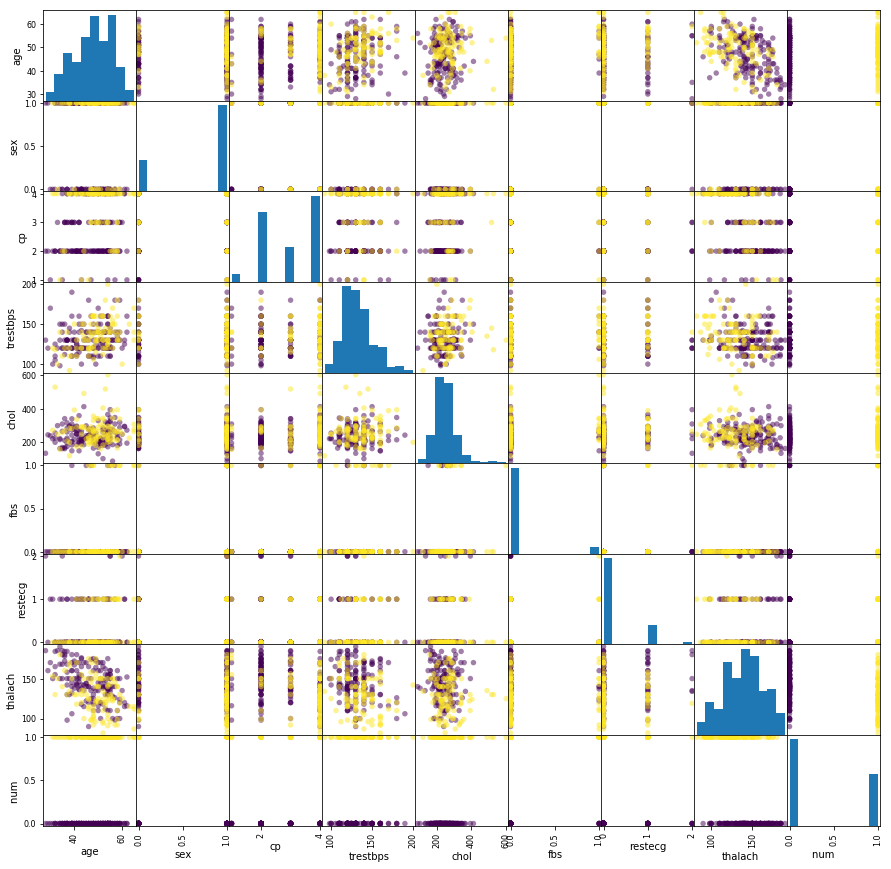

In [10]:
pd.plotting.scatter_matrix(heart, c=attack, figsize=(15,15), marker='o', s=30),
plt.show()

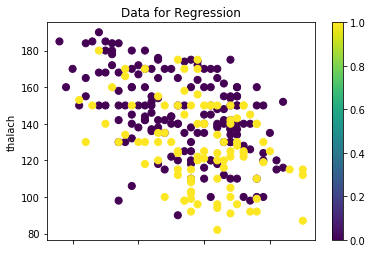

In [11]:
heart.plot.scatter(x='age', y='thalach', c=attack, colormap='viridis', s=50, title='Data for Regression');


In [12]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

X = heart.ix[:, 0:1]
y = heart.ix[:, 7:8]
print(X.shape)
print(y.shape)
#2=heart['age']
#2.shape
reg.fit(X,y)

(261, 1)
(261, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
#X_new = np.linspace(20, 90, 1000).reshape(-1,1)

In [14]:
y_proba = reg.predict(X)
y_proba

array([[166.78199396],
       [165.38817605],
       [163.99435814],
       [162.60054023],
       [161.20672231],
       [161.20672231],
       [161.20672231],
       [159.8129044 ],
       [158.41908649],
       [158.41908649],
       [158.41908649],
       [157.02526858],
       [157.02526858],
       [157.02526858],
       [157.02526858],
       [155.63145067],
       [155.63145067],
       [155.63145067],
       [155.63145067],
       [154.23763276],
       [154.23763276],
       [154.23763276],
       [154.23763276],
       [154.23763276],
       [154.23763276],
       [154.23763276],
       [152.84381484],
       [152.84381484],
       [151.44999693],
       [151.44999693],
       [151.44999693],
       [151.44999693],
       [151.44999693],
       [151.44999693],
       [151.44999693],
       [151.44999693],
       [150.05617902],
       [150.05617902],
       [150.05617902],
       [150.05617902],
       [148.66236111],
       [148.66236111],
       [148.66236111],
       [148

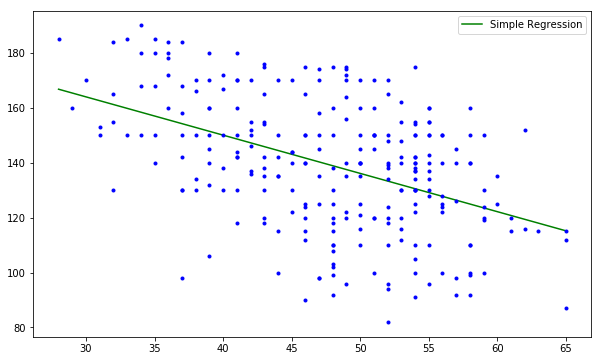

In [15]:
f = plt.figure(figsize=(10, 6))
plt.plot(X, y_proba[:, 0], "g-", label="Simple Regression")
plt.plot(X, y, 'bo', markersize=3)
plt.legend(loc='best')

In [16]:
reg.score(X, y)

0.21168738219258176

In [17]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [18]:
sample = reg.predict(50)
sample

array([[136.11799991]])

In [19]:
X.dtypes

age    int64
dtype: object

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42, C=10**10)
log_reg.fit(X, y)

C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [21]:
reg2 = linear_model.LinearRegression()
reg2.fit(X2, y2)

NameError: name 'X2' is not defined

In [ ]:
y2_proba = reg2.predict(X2)

In [ ]:
y2_proba

In [ ]:
y3_proba =log_reg.predict_proba(X2)
y3_proba

In [ ]:
f = plt.figure(figsize=(10, 6))
plt.plot(X2, y3_proba[:, 0], "g-", label="Simple Regression")
plt.plot(X2, y2, 'bo', markersize=3)
plt.legend(loc='best')

In [ ]:
plot_decision_regions(X2, y2, log_reg)

In [ ]:
X2

In [ ]:
heart

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
a = heart.ix[:, 0:7]
b = heart.ix[:, 7:8]

In [24]:
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(a, b, random_state=2304)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [37]:
from sklearn.datasets import make_regression
#X_train_all, y_train_all = make_regression(n_features=2, n_informative=2, random_state=2304, shuffle=False)
regr = RandomForestRegressor()
regr.fit(X_train_all, y_train_all)
importances=regr.feature_importances_
importances

C:\Users\Lukas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


array([0.37766636, 0.03122198, 0.1455465 , 0.15768543, 0.25760407,
       0.0095036 , 0.02077206])

In [38]:
y_pred=regr.predict(X_test_all)
y_pred

array([179.2, 152.5, 113.4, 106. , 122.6, 126.6, 135. , 129.2, 162.8,
       137.5, 163.6, 123.8, 115.6, 152.2, 176.6, 135. , 142.4, 138.6,
       129.4, 144.8, 150.4, 137.8, 132.5, 110.9, 146.3, 161.5, 118.5,
       149.7, 137.1, 122.6, 123.2, 127.2, 155.2, 120.1, 150.4, 155.5,
       140.7, 176.4, 129.6, 138.2, 127.5, 130.1, 144.8, 139.6, 152.4,
       116.1, 148.9, 150.4, 139.7, 114.9, 152.1, 142.2, 154.6, 133.7,
       149.8, 146.5, 121.6, 144.4, 119.3, 139.2, 153.6, 119.8, 180.8,
       111.9, 154.3, 146.5])

In [39]:
regr.score(X_test_all, y_test_all)

0.2658762820086914

In [40]:
a

,age,sex,cp,trestbps,chol,fbs,restecg
0,28,1,2,130,132,0,2
1,29,1,2,120,243,0,0
3,30,0,1,170,237,0,1
4,31,0,2,100,219,0,1
5,32,0,2,105,198,0,0
6,32,1,2,110,225,0,0
7,32,1,2,125,254,0,0
8,33,1,3,120,298,0,0
9,34,0,2,130,161,0,0
10,34,1,2,150,214,0,1


In [41]:
a2 = heart.ix[:, ['cp', 'chol', 'thalach']]

In [42]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(a2, b, random_state=2304)
regr3 = RandomForestRegressor()
regr.fit(X_train_3, y_train_3)
importances=regr.feature_importances_
regr.score(X_test_3, y_test_3)

C:\Users\Lukas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9955610506236356

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test_all, y_pred)  

0.2658762820086914

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_all, y_pred)

525.0637878787878

In [46]:
from sklearn import svm
svm_reg = svm.SVR()
svm_reg.fit(X_train, y_train)
y_pred_svm=svm_reg.predict(X_test)
mean_squared_error(y_test, y_pred_svm)

C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


436.5436129251384

In [47]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)
y_pred_sgd=sgd_reg.predict(X_test)
mean_squared_error(y_test, y_pred_sgd)

C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3.2271420863595307e+24

In [48]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
y_pred_knn=knn_reg.predict(X_test)
mean_squared_error(y_test, y_pred_knn)

490.33660377358484

In [49]:
from sklearn.gaussian_process import GaussianProcessRegressor
gau_reg = GaussianProcessRegressor()
gau_reg.fit(X_train, y_train)
y_pred_gau=gau_reg.predict(X_test)
mean_squared_error(y_test, y_pred_gau)

450.5146182438115

In [50]:
gau_reg.score(X_test, y_test)

0.006208909168615494

In [51]:
'''this seems way to good '''

'this seems way to good '

In [52]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor()
mlp_reg.fit(X_train, y_train)
y_pred_mlp=mlp_reg.predict(X_test)
mean_squared_error(y_test, y_pred_mlp)

C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1381.8264810420321

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 10)]
bootstrap = [True, False]
criterion = ['mse', 'mae']

random_grid = {'n_estimators': n_estimators, 'bootstrap': bootstrap, 'criterion': criterion}

print(random_grid)

{'n_estimators': [1, 23, 45, 67, 89, 111, 133, 155, 177, 200], 'bootstrap': [True, False], 'criterion': ['mse', 'mae']}


In [55]:
#from sklearn.model_selection import RandomizedSearchCV
#grid = GridSearchCV(estimator=regr, param_grid=random_grid, scoring='neg_mean_squared_error')
#grid.fit(X_train, y_train)

In [56]:
#grid.best_estimator_

In [57]:
regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=89, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
mean_squared_error(y_test, y_pred)

C:\Users\Lukas\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


410.55686256638376

In [58]:
X3 = heart.ix[:, ['age']]
y3 = heart.ix[:, ['thalach']]
print(X3.shape)
print(y3.shape)

(261, 1)
(261, 1)


In [59]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42, test_size=0.2)

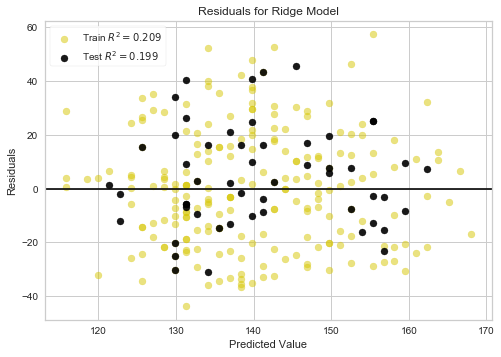

In [60]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

#Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge, hist=False, train_color='y', test_color='black')
visualizer.fit(X3_train, y3_train)  # Fit the training data to the model
visualizer.score(X3_test, y3_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

In [61]:
visualizer = ResidualsPlot(svm_reg, hist=False, train_color='y', test_color='black')
visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Shape of passed values is (208, 208), indices imply (1, 208)

In [62]:
visualizer = ResidualsPlot(regr, hist=False, train_color='y', test_color='black')
B=visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

C:\Users\Lukas\Anaconda3\lib\site-packages\yellowbrick\base.py:304: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


ValueError: Shape of passed values is (208, 208), indices imply (1, 208)

In [63]:
X_train.shape

(208, 1)

In [64]:
B

NameError: name 'B' is not defined

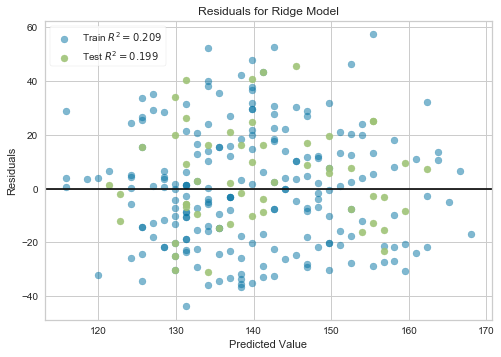

In [65]:
from sklearn.linear_model import Ridge
ridge = Ridge()
visualizer = ResidualsPlot(ridge, hist=False)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

In [66]:
X2 = heart.ix[:, ['age', 'thalach']]
y2 = heart.ix[:, 8:]
print(X2.shape)
print(y2.shape)

(261, 2)
(261, 1)


In [67]:
X2 = X2.values
y2 = y2.values
y2.shape

(261, 1)

In [68]:
y2 = y2.reshape(261,)
y2.shape
#X2.shape

(261,)

In [69]:
X=X2
y=y2

In [70]:
def plot_decision_regions(X, y, classifier):
    """
    Modified from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch03/ch03.ipynb
    """
    
    f = plt.figure()

    # Find the lower and upper values for the petal length and petal width
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Generate a bunch of measurements in-between the min and max values
    x0, x1 = np.meshgrid(
        np.linspace(x0_min, x0_max, 500).reshape(-1, 1),
        np.linspace(x1_min, x1_max, 200).reshape(-1, 1),
    )
    
    X_new = np.array([x0.ravel(), x1.ravel()]).T
    
    # Predict with the classifier on the new data
    Z = classifier.predict(X_new)
    
    # Reshape and plot as a contour plot:
    Z = Z.reshape(x0.shape)
    plt.contourf(x0, x1, Z, alpha=0.4, cmap=plt.cm.brg)
    
    # Add the training instances to the plot
    
    markers = ['o', 'x']
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    edgecolor='black', 
                    marker = markers[idx],
                    label=cl)
        
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")

    plt.text(x0_min+2, x0_min+2, "Not Iris-Virginica", fontsize=12, color="b", ha="center")
    plt.text(x1_max+3, x1_max-2, "Iris-Virginica", fontsize=12, color="g", ha="center")

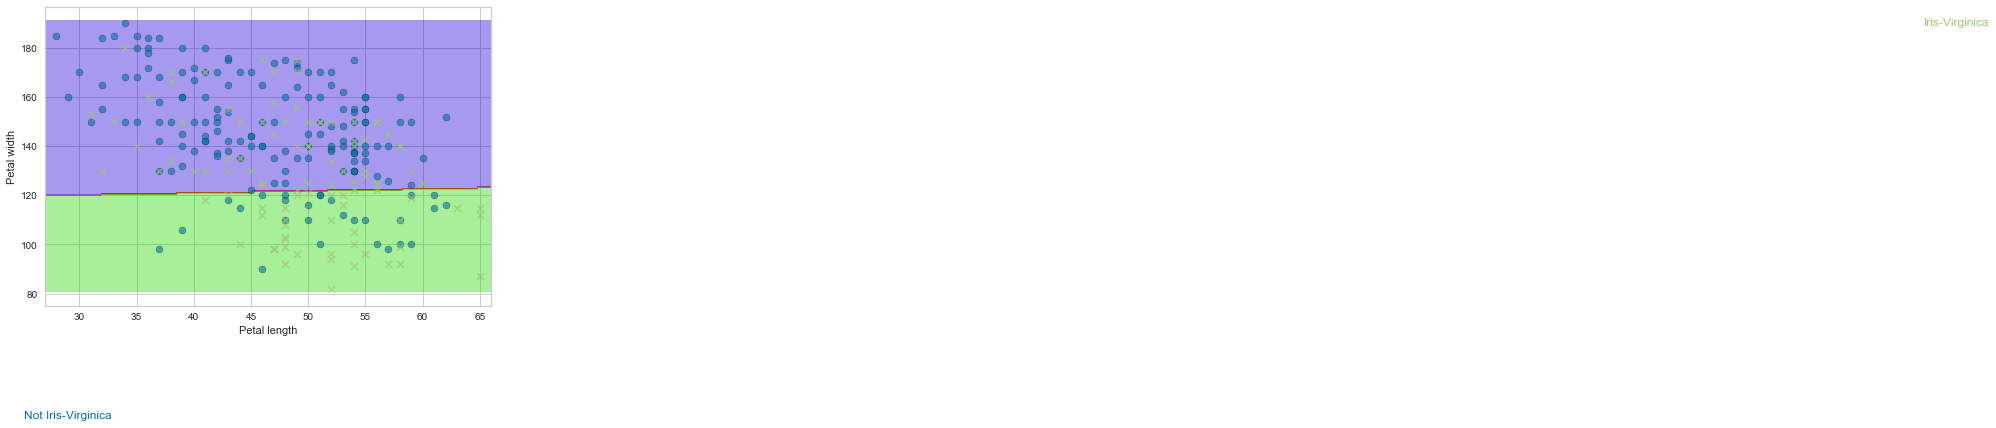

In [71]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X2,y2)
plot_decision_regions(X2, y2, softmax_reg)


In [72]:
regr2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=89, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
regr2.fit(X2, y2)
#y_pred=regr.predict(X_test)
#mean_squared_error(y_test, y_pred)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=89, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

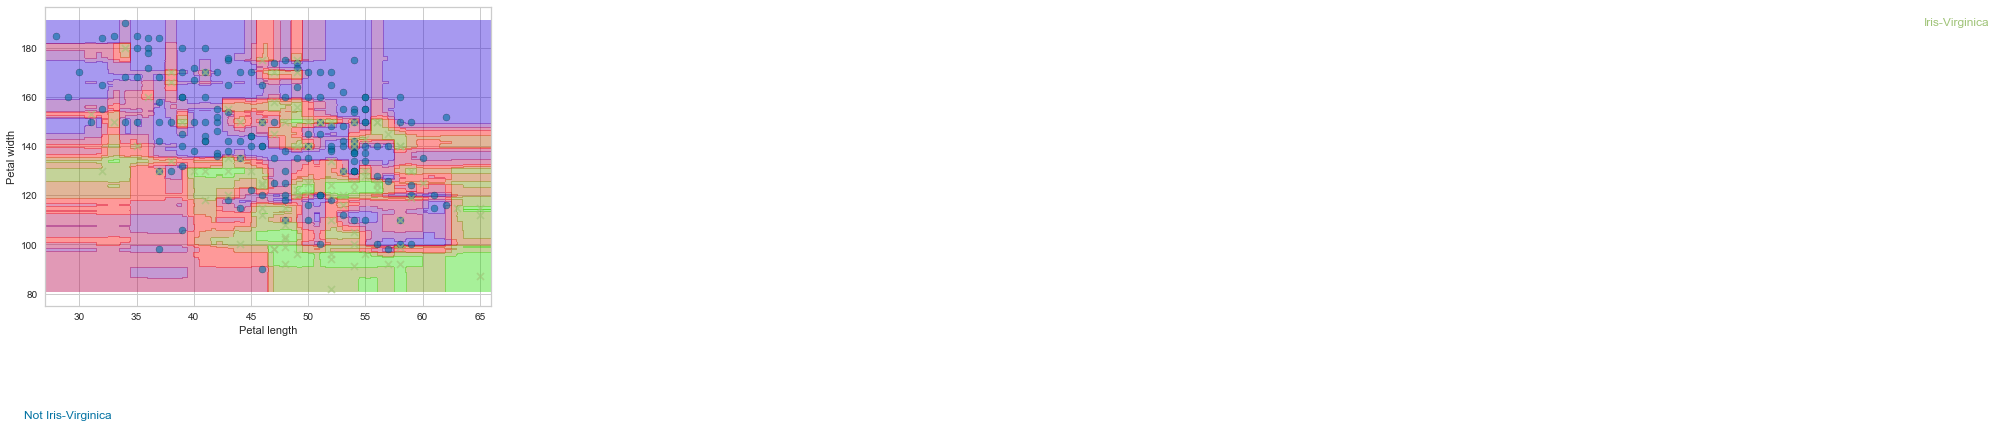

In [73]:
plot_decision_regions(X2, y2, regr2)

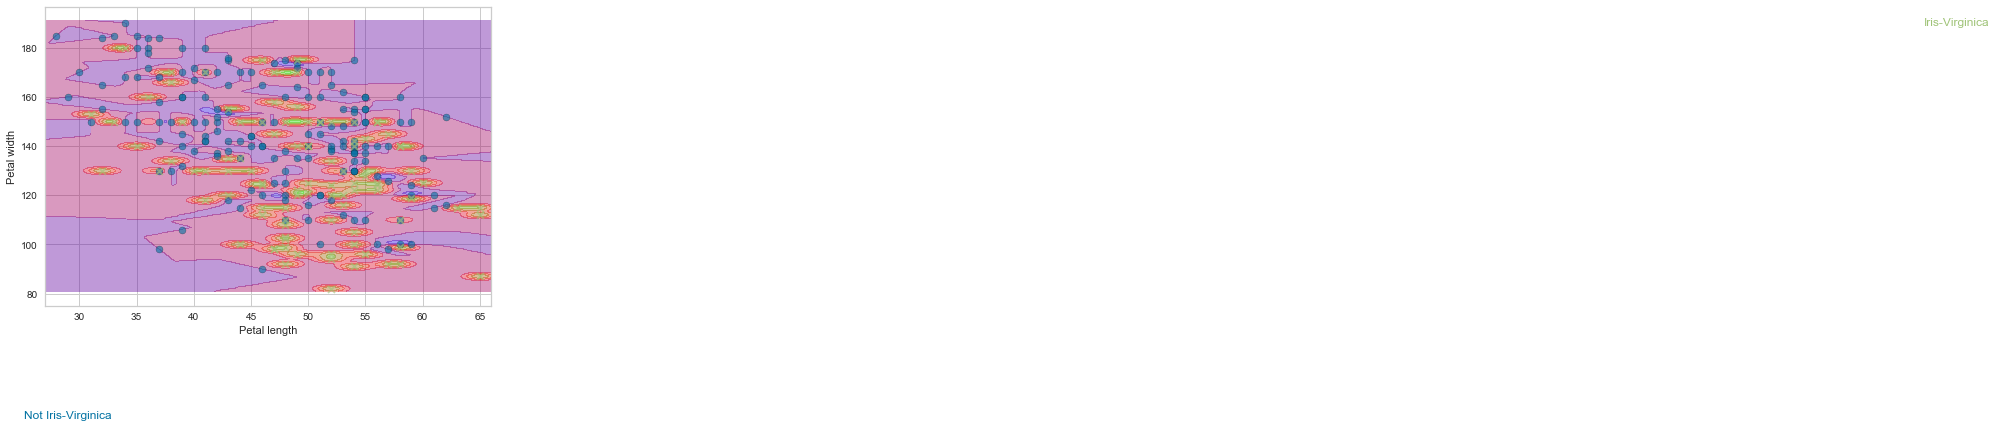

In [74]:
from sklearn.gaussian_process import GaussianProcessRegressor
gau_reg = GaussianProcessRegressor()
gau_reg.fit(X2, y2)
plot_decision_regions(X2, y2, gau_reg)

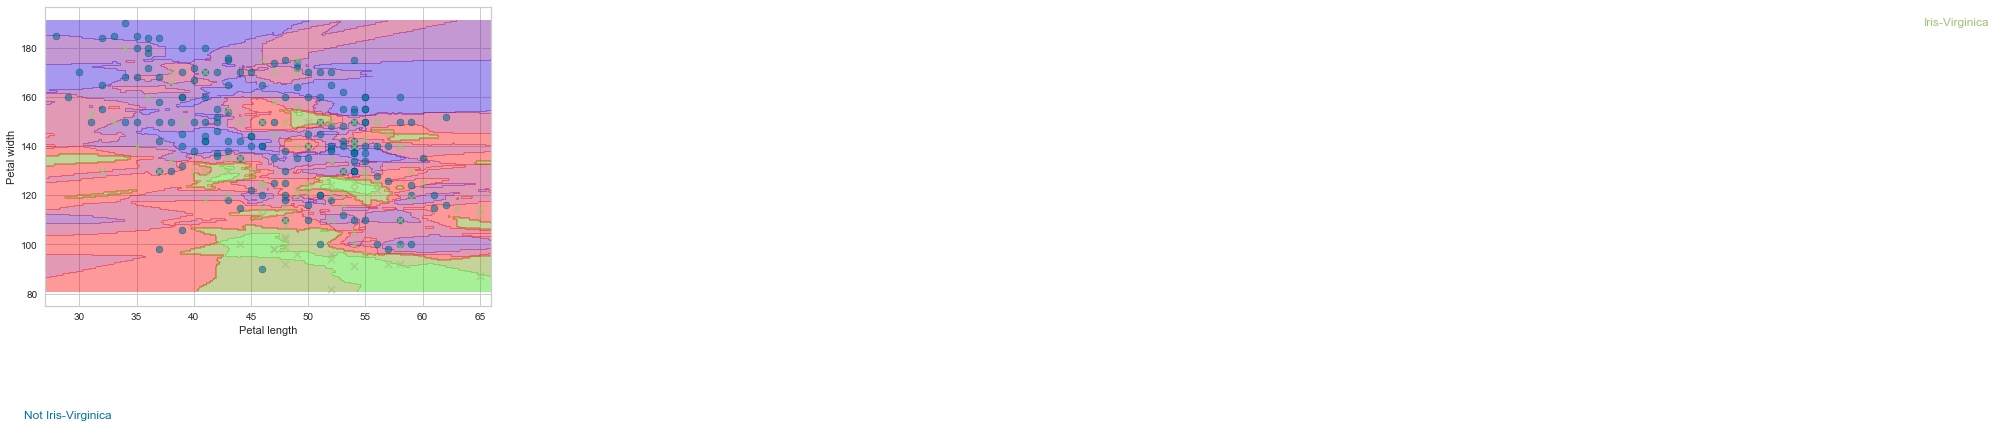

In [75]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X2, y2)
plot_decision_regions(X2, y2, knn_reg)